# DATA EXPLORATION

In [2]:
# IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from collections import Counter
import warnings
warnings.simplefilter('ignore')

#IMPORT THE LIBRARIES FOR VARIOUS CLASSIFIER
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
#LOAD THE WINE DATASETS
#LOAD RED WINE DATA
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

#LOAD WHITE WINE DATA
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')



In [4]:
#DISPLAY FIRST FIVE INSTANCES OF BOTH DATA SET
print('RED WINE')
display(red.head(5))
print('\n')
print('WHITE WINE')
display(white.head(5))

RED WINE


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5




WHITE WINE


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#DESCRIBE THE RED WINE
print('RED WINE')
red.describe()

RED WINE


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#DESCRIBE THE WHITE WINE
print('WHITE WINE')
white.describe()

WHITE WINE


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
#DISPLAY THE ADDITIONAL INFORMATION OF DATA SET
print('RED WINE')
red.info()
print('\n')
print('WHITE WINE')
white.info()

RED WINE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


WHITE WINE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar         

In [8]:
#CHECKING FOR ANY MISSING DATA
print('RED WINE')
print(red.isnull().any())
print('\n')
print('WHITE WINE')
print(white.isnull().any())

RED WINE
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


WHITE WINE
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


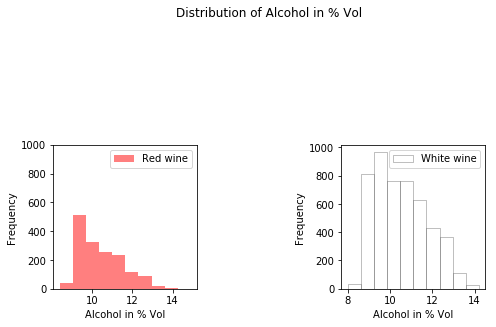

In [9]:
#PLOTTING THE DISTRIBUTION OF ALCOHOL
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()



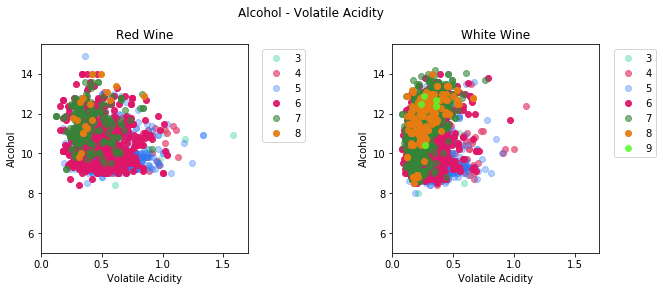

In [10]:
#SCATTER PLOT OF ALCOHOL VS VOLATILE ACIDITY
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

# PREPROCESSING DATA

In [11]:
#ADDING THE COLUMN 'TYPE' TO RED WINE WITH VALUE 1
red['type'] = 1

#ADDING THE COLUMN 'TYPE' TO WHITE WINE WITH VALUE 0
white['type']= 0

#APPENDING BOTH THE RED AND WHITE WINE
wines = pd.concat([red,white])

#RANDOMIZING THE DATA SET
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
#SHAPE OF THE ENTIRE DATA
wines.shape

(6497, 13)

In [13]:
#DESCRIBE THE FIRST FIVE ROWS OF THE DATA
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,0


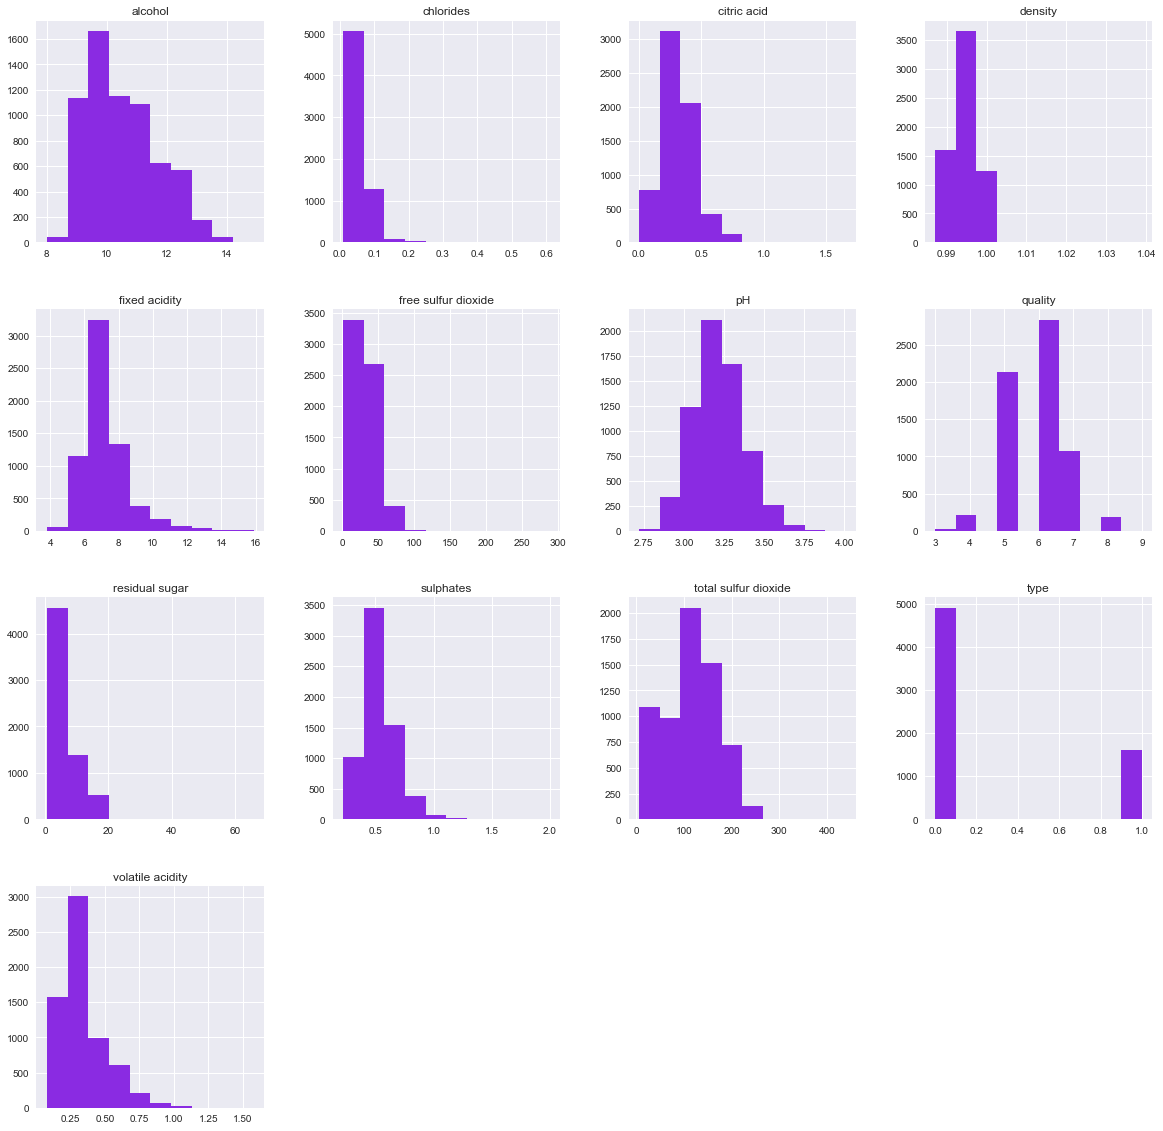

In [14]:
#GRAPHICAL REPRESENTATION OF FEATURES
sns.set()
pd.DataFrame.hist(wines,figsize = [20,20], color= 'blueviolet')
plt.show()

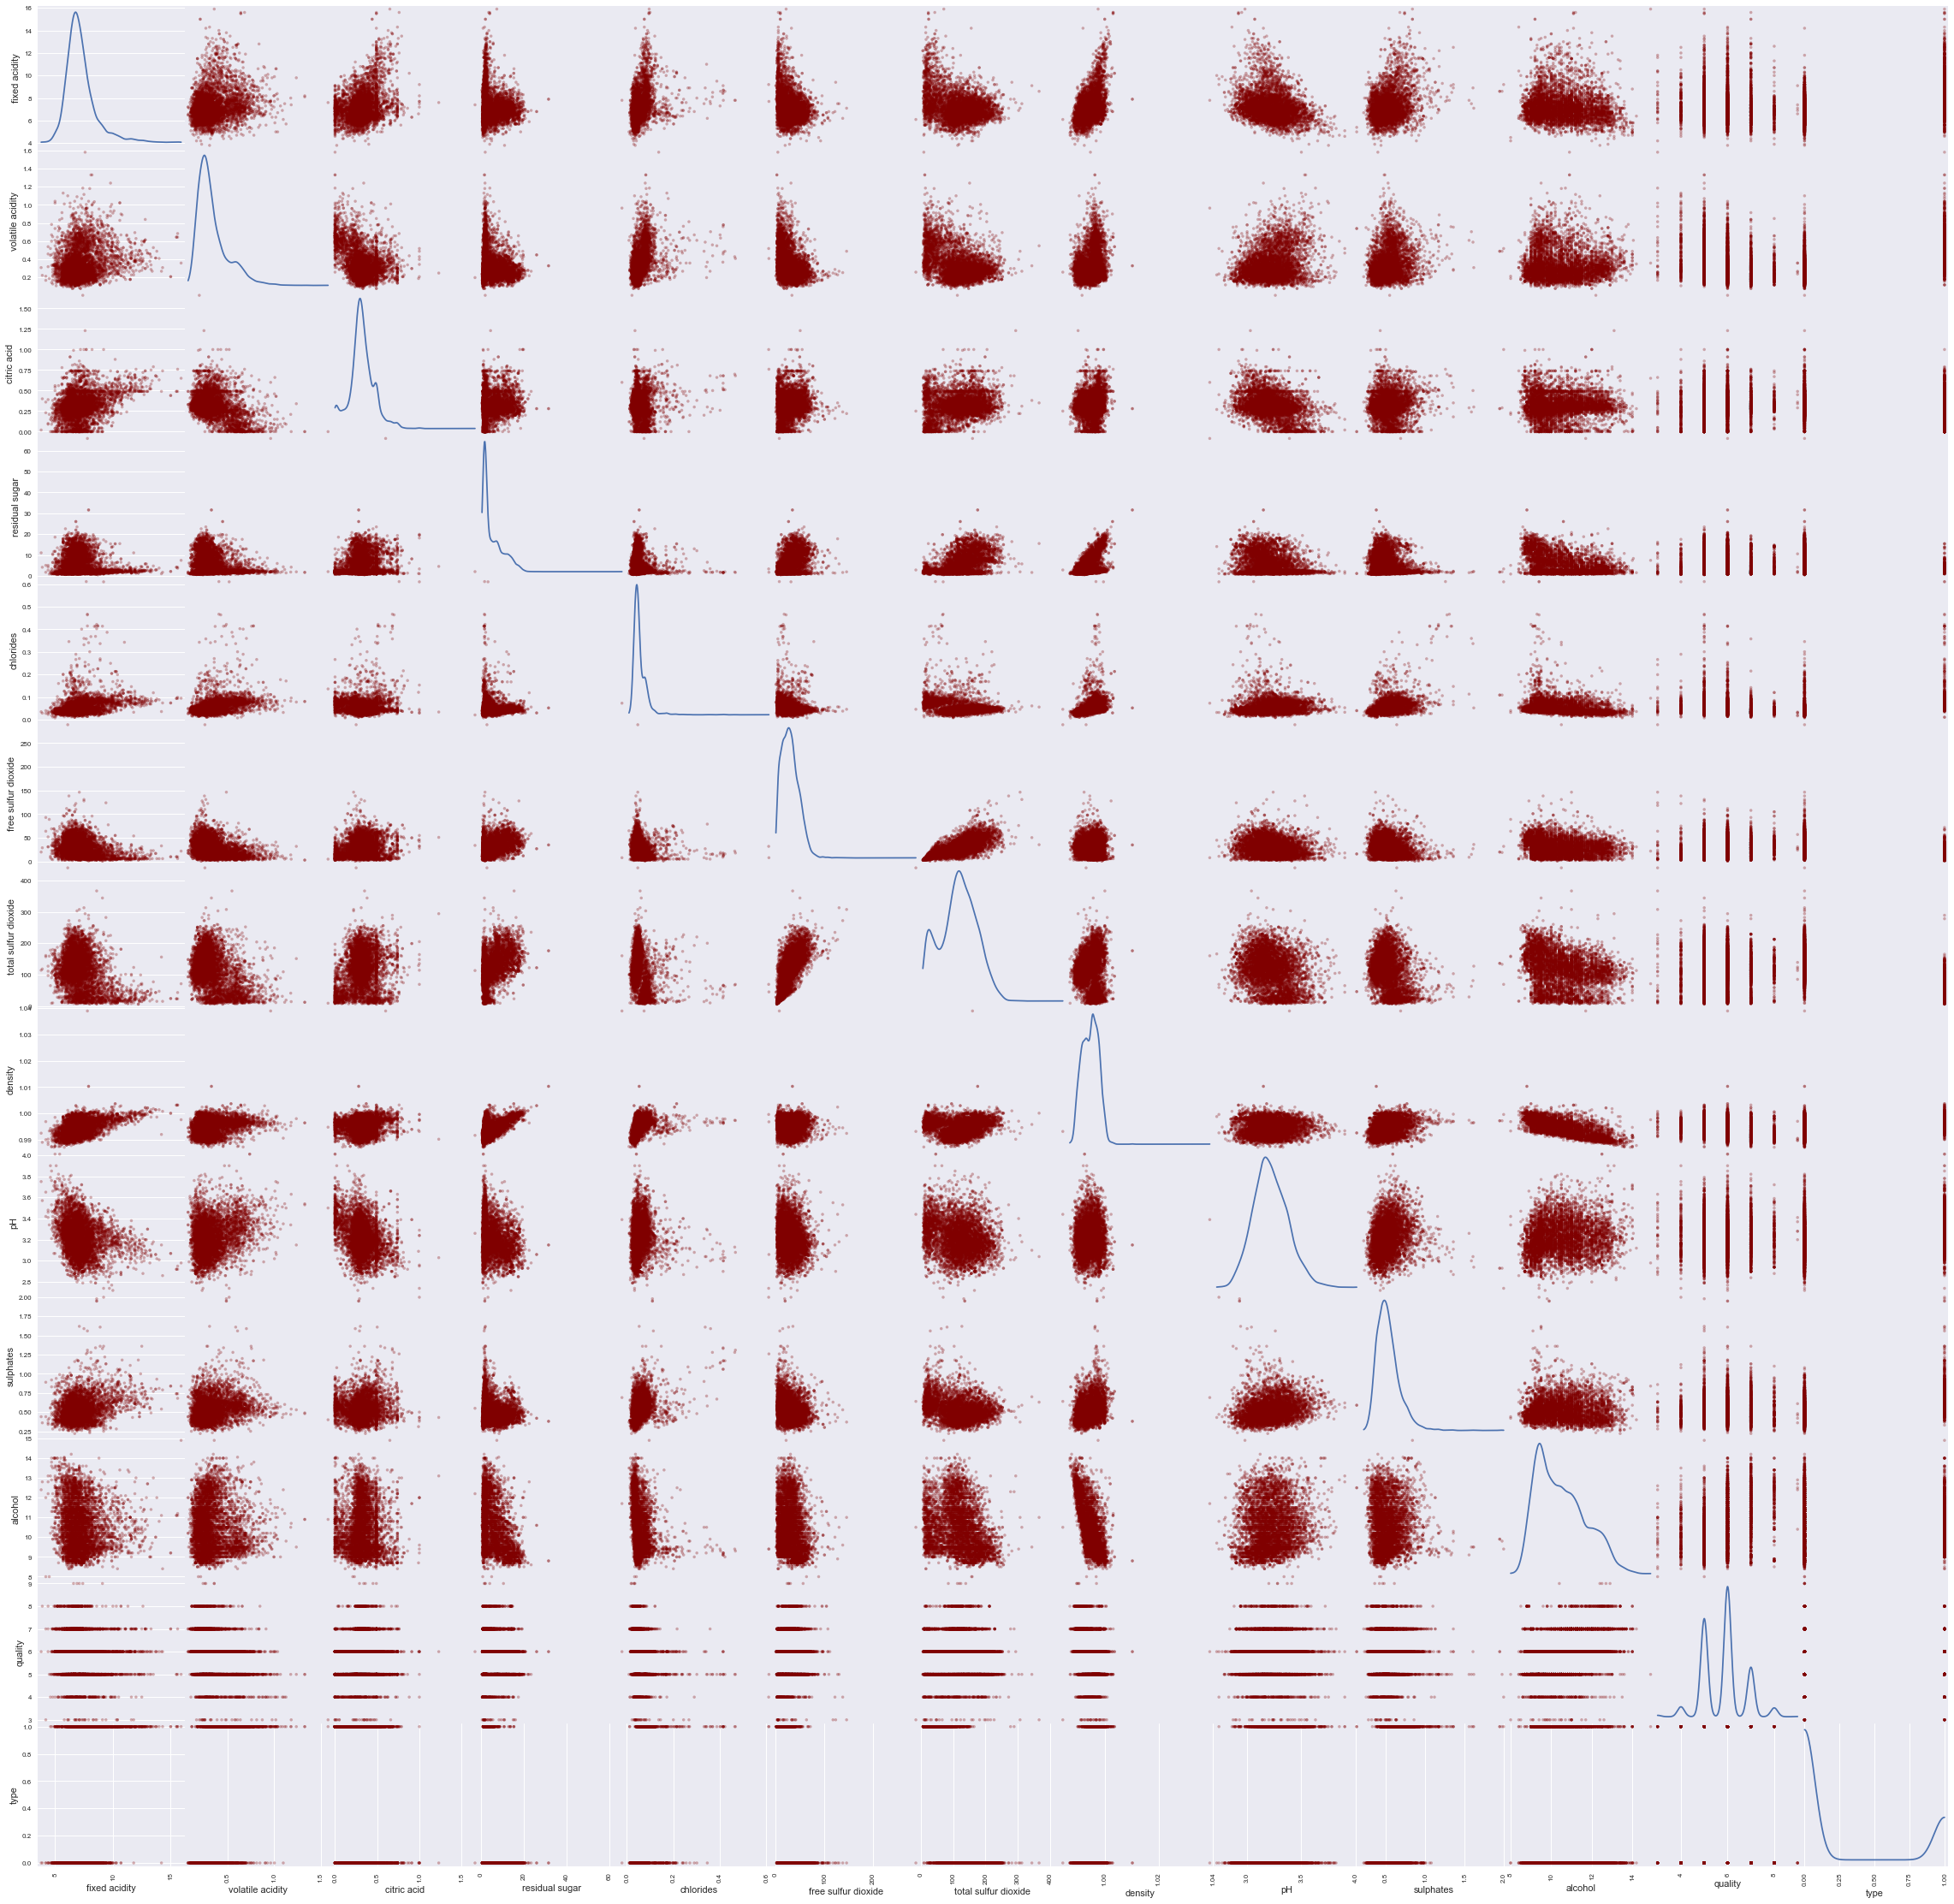

In [15]:
#EXPLORING RELATIONSHIP BETWEEN FEATURES
pd.plotting.scatter_matrix(wines, alpha=0.3,color='maroon',figsize =(40,40), diagonal ='kde')
plt.show()

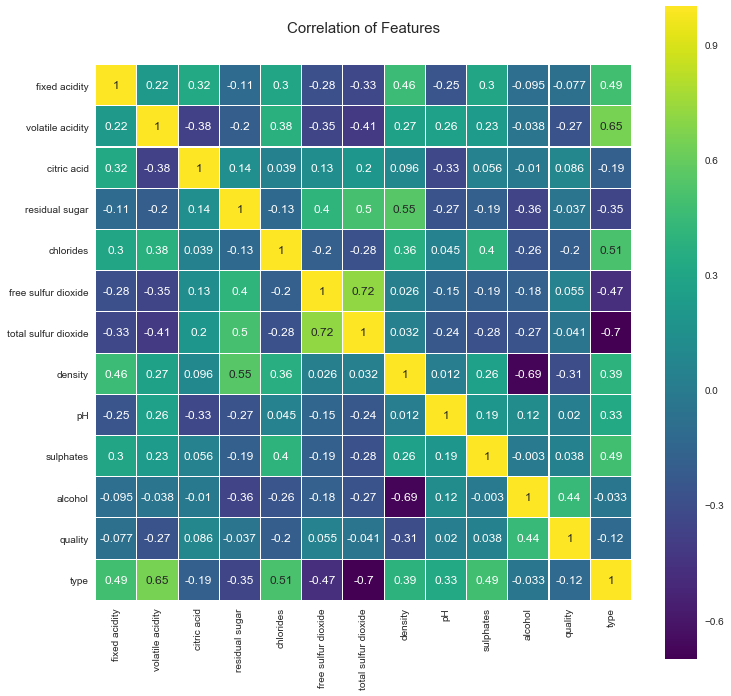

In [16]:
#CORRELATION AMONG THE FEATURES 
#Displaying the heatmap for correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features',y=1.05, size=15)
sns.heatmap(wines.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

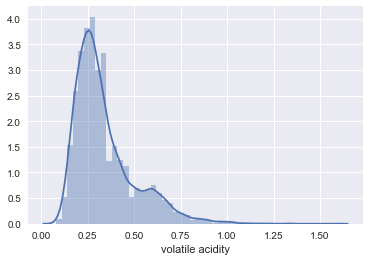

In [17]:
#PLOT FOR THE FEATURE VOLATILE ACIDITY
sns.distplot(wines['volatile acidity'])
plt.show()

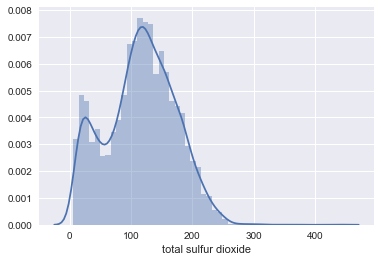

In [18]:
#PLOT FOR THE FEATURE TOTAL SULFUR DIOXIDE
sns.distplot(wines['total sulfur dioxide'])
plt.show()

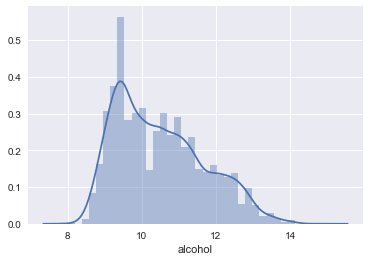

In [19]:
#PLOT FOR THE FEATURE ALCOHOL
sns.distplot(wines['alcohol'])
plt.show()

In [20]:
#SPLITTING THE DATA INTO FEATURES AND TARGET VARIBALE
X = wines.iloc[:,:-2]
y = wines['type']
features = X.columns

In [21]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
#DISPLAY THE FIRST FEW INSTANCES OF THE FEATURES 
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


In [23]:
#DISPLAY THE LAST FEW INSTANCES OF THE TRAINING SET
X.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5
6496,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5


In [24]:
#DISPLAY THE FIRST FEW INSTANCES OF THE TEST SET
y.head()

0    0
1    1
2    0
3    0
4    0
Name: type, dtype: int64

In [25]:
#DISPLAY THE LAST FEW INSTANCES OF THE TRAINING SET
y.tail()

6492    0
6493    0
6494    0
6495    0
6496    1
Name: type, dtype: int64

###### FEATURE SCALING

In [26]:
#SCALING OR NORMIALIZATION OF THE FESTURES TO OBTAIN BEST ACCURACY
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

#### STRATIFIED CROSS VALIDATION 

In [27]:
#APPLYING THE STRTIFIED CROSS VALIDATION ON THE DATA DUE TO PRESENCE OF IMBALANCE LABEL
k_folds= 5
X = np.array(X)
y= np.array(y)

skf = StratifiedKFold(n_splits=k_folds,random_state=42)

# CLASSIFIER ALGORITHMS

###### K-NEAREST NEIGHBOR ALGORITHM

In [30]:
#Applying the knn algorithm 
knn= KNeighborsClassifier(n_neighbors=10)
knn_score =cross_val_score(knn,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(knn_score))

F1 Score: 0.991689226941


In [31]:
#Finding the optimal paramters of KNN using Grid Search
parameters = {"n_neighbors": range(1,50),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan","chebyshev","minkowski"]}
KNN_optimal= KNeighborsClassifier()

#Applying grid search to obtain parameters
grid_knn = GridSearchCV(KNN_optimal,parameters, cv=10)
grid_knn.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
#Display the best optimal parameters for KNN
print(grid_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [33]:
#Display the best accuracy score for the optimal model
print(grid_knn.best_score_)

0.994920732646


###### GAUSSIAN NAIVE BAYES

In [49]:
#APPLYING THE GAUSSIAN NAIVE BAYES 
G_naive_bayes = GaussianNB()
G_score =cross_val_score(G_naive_bayes,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(G_score))

F1 Score: 0.97614365533


###### BERNOULLI NAIVE BAYES

In [36]:
#APPLYING THE BERNOULLI NAIVE BAYES 
B_naive_bayes = BernoulliNB()
B_score =cross_val_score(B_naive_bayes,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(B_score))

F1 Score: 0.772201284109


###### DECISION TREE

In [37]:
#APPLYING DECISION TREE
DT = DecisionTreeClassifier(random_state=42)
DT_score =cross_val_score(DT,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(DT_score))

F1 Score: 0.986146618377


In [47]:
#FINDING THE OPTIMAL PARAMETR OF DECISION TREE USING GRID SEARCH
DT_optimal = DecisionTreeClassifier(random_state=42)

parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
               'max_depth': [1,2,3,4,5],
               'max_features': [1,2,3,4]}

#Applying grid search to obtain parameters
grid_dt = GridSearchCV(DT_optimal,parameters, cv=10)
grid_dt.fit(X,y)

#DISPLAY THE BEST OPTIMAL PARAMETERS FRO KNN
print('BEST OPTIMAL PARAMETERS:',grid_dt.best_params_)
print('\n')

#Display the best accuracy score for the optimal model
print('ACCURACY',grid_dt.best_score_)

BEST OPTIMAL PARAMETERS: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'best'}


ACCURACY 0.983530860397


###### LINEAR SUPPORT VECTOR MACHINE

In [38]:
# APPLYING SVM TO THE DATASET LINEAR KERNEL
SVM = LinearSVC()
S_score =cross_val_score(SVM,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(S_score))

F1 Score: 0.990919166584


###### SUPPORT VECTOR MACHINE (rbf) KERNEL

In [39]:
# APPLYING SVM TO THE DATASET rbf KERNEL
SVMr = SVC(random_state=42)
Sr_score =cross_val_score(SVMr,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(Sr_score))

F1 Score: 0.987994430668


###### RANDOM FOREST CLASSIFIER

In [40]:
#APPLYING THE RANDOM FOREST ALGORITHM
RF = RandomForestClassifier(max_depth=None, random_state=42)
rf_score =cross_val_score(RF,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(rf_score))

F1 Score: 0.993381297217


In [48]:
#FINDING THE OPTIMAL PARAMETERS OF RANDOM FOREST USING GRID SEARCH
RF_optimal =RandomForestClassifier(random_state=12)

parameters = {'n_estimators':[10,20,30],
            'max_depth': [1,2,3,],
             'criterion':['gini','entropy'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3],
             'max_leaf_nodes':[5,10,15],
             'bootstrap':['True','False']}
            
#Applying grid search to obtain parameters
grid_rf = GridSearchCV(RF_optimal,parameters, cv=10)
grid_rf.fit(X,y)

#DISPLAY THE BEST OPTIMAL PARAMETERS FRO KNN
print('BEST OPTIMAL PARAMETERS:',grid_rf.best_params_)
print('\n')

#Display the best accuracy score for the optimal model
print('ACCURACY',grid_rf.best_score_)

BEST OPTIMAL PARAMETERS: {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


ACCURACY 0.990457134062


###### LOGISTIC REGRESSION

In [41]:
#APPLYING LOGISTIC REGRESSION TO THE DATA SETS
LR = LogisticRegression()
Lr_score =cross_val_score(LR,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(Lr_score))

F1 Score: 0.987070524158


###### GRADIENT BOOSTING CLASSIFIER

In [42]:
#APPLYING GRADIENT BOOSTING TO THE DATA SETS
GB = GradientBoostingClassifier(random_state=42)
gb_score =cross_val_score(GB,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(gb_score))

F1 Score: 0.994458457345


###### MULTILAYER PERCEPTRON

In [43]:
MP = MLPClassifier(alpha=1)
mp_score =cross_val_score(MP,X,y,cv=skf,scoring='f1_micro')

#PRINT THE ACCURACY 
print('F1 Score:',np.mean(mp_score))

F1 Score: 0.98476188401


###### FEATURE IMPORTANCE BY GRADIENT BOOSTING CLASSIFIER

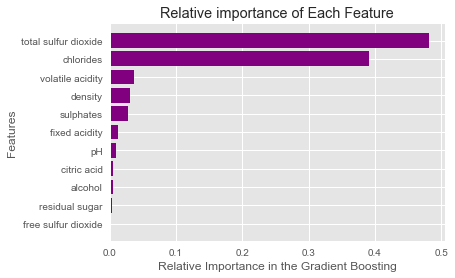

In [44]:
#Feature importance
gbi = GradientBoostingClassifier(n_estimators=20)
gbi.fit(X,y)
importance_list = gbi.feature_importances_

name_list = wines.columns[:-1]
# Sort by the importance
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
y_pos = np.arange(len(name_list))

plt.barh(y_pos,importance_list,align='center',color='purple')
plt.yticks(range(len(name_list)),name_list)

plt.xlabel('Relative Importance in the Gradient Boosting')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

###### VISUALIZE MODEL DECISION SURFACE

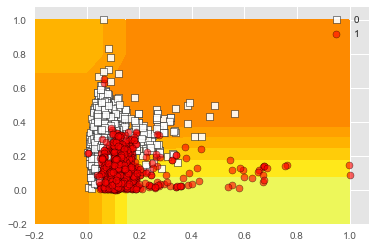

In [45]:
import model_evaluation_utils as meu
gb = GradientBoostingClassifier(n_estimators=20)
feature_indices = [i for i, feat in enumerate(features)
                      if feat in ['total sulfur dioxide','chlorides']]
meu.plot_model_decision_surface(clf=gb, train_features=X[:,feature_indices],
                               train_labels=y,plot_step =0.20,cmap=plt.cm.Wistia_r,
                               markers=[',','o'],alphas=[0.9,0.6],colors=['w','r'])

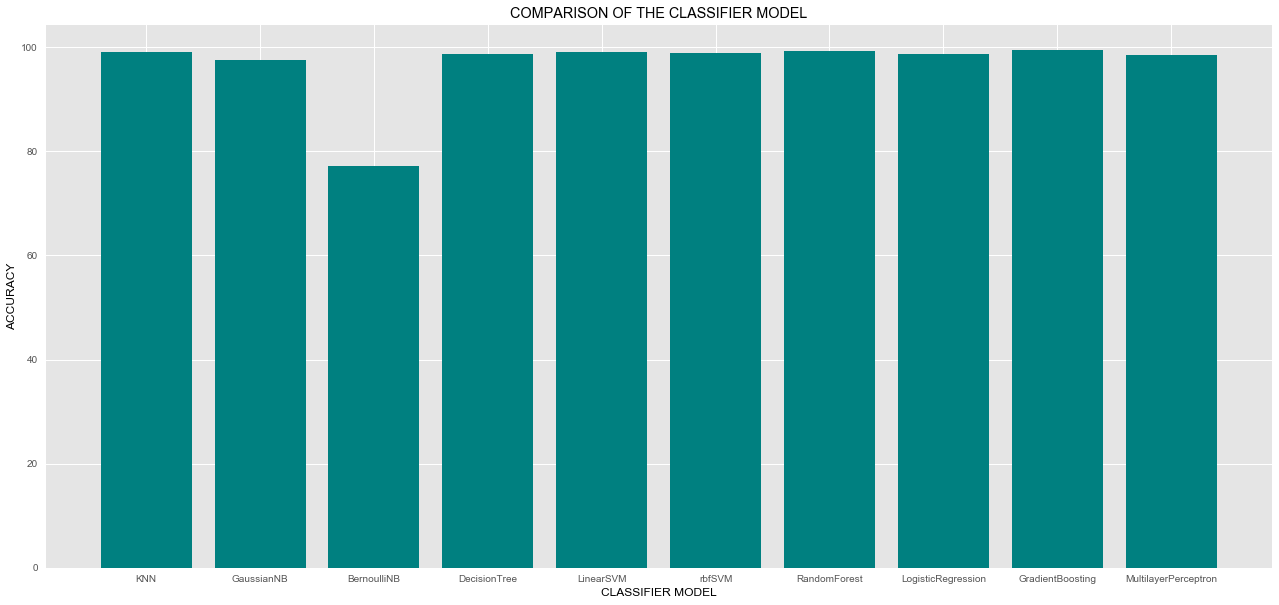

In [46]:
#COMPARISON OF VARIOUS MODEL ACCURACY BAR GRAPH
x = ("KNN", "GaussianNB", "BernoulliNB", "DecisionTree","LinearSVM","rbfSVM",
           "RandomForest","LogisticRegression","GradientBoosting","MultilayerPerceptron")
plt.figure(1,figsize=(22,10))
acc= [99.16,97.61,77.22,98.61,99.09,98.79,99.33,98.70,99.44,98.59]

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, acc, color='teal',label='black')
plt.xlabel("CLASSIFIER MODEL",color='black')
plt.ylabel("ACCURACY",color='black')
plt.title("COMPARISON OF THE CLASSIFIER MODEL",color='black')

plt.xticks(x_pos, x)
plt.show()